In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
import ast

### **Computational Efficiency Evaluation**

In [2]:
base_dir = 'C:\\Users\\jenit\\Desktop\\Main Code\\LLama-8B-Instruct'  

techniques = ['Zero-Shot', 'One-Shot', 'Few-Shot', 'CoT']

for technique in techniques:
    dfs = []
    
    technique_folder = os.path.join(base_dir, technique)
    
    for i in range(1, 6):
        file_path = os.path.join(technique_folder, f'emissions_{i}.csv')
        df = pd.read_csv(file_path)
        
        df = df[['emissions', 'duration', 'gpu_energy']]
        
        dfs.append(df)
    
    combined_df = pd.concat(dfs, axis=0, keys=range(len(dfs)))

    grouped_df = combined_df.groupby(level=1)

    result = grouped_df.agg(
        emissions_mean=('emissions', 'mean'),
        emissions_std=('emissions', 'std'),
        duration_mean=('duration', 'mean'),
        duration_std=('duration', 'std'),
        gpu_energy_mean=('gpu_energy', 'mean'),
        gpu_energy_std=('gpu_energy', 'std')
    )

    output_file = os.path.join(technique_folder, f'{technique}_global_dataset.csv')
    result.to_csv(output_file)
    
    print(f"Averaged data with standard deviations for {technique} saved as '{output_file}'")

Averaged data with standard deviations for Zero-Shot saved as 'C:\Users\jenit\Desktop\Main Code\LLama-8B-Instruct\Zero-Shot\Zero-Shot_global_dataset.csv'
Averaged data with standard deviations for One-Shot saved as 'C:\Users\jenit\Desktop\Main Code\LLama-8B-Instruct\One-Shot\One-Shot_global_dataset.csv'
Averaged data with standard deviations for Few-Shot saved as 'C:\Users\jenit\Desktop\Main Code\LLama-8B-Instruct\Few-Shot\Few-Shot_global_dataset.csv'
Averaged data with standard deviations for CoT saved as 'C:\Users\jenit\Desktop\Main Code\LLama-8B-Instruct\CoT\CoT_global_dataset.csv'


C:\Users\jenit\AppData\Local\Temp\ipykernel_15184\3404595380.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=techniques, y=durations, ax=axs[0], palette="Blues_d")
C:\Users\jenit\AppData\Local\Temp\ipykernel_15184\3404595380.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=techniques, y=emissions, ax=axs[1], palette="Greens_d")
C:\Users\jenit\AppData\Local\Temp\ipykernel_15184\3404595380.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=techniques, y=gpu_energies, ax=axs[2], palette="Reds_d")


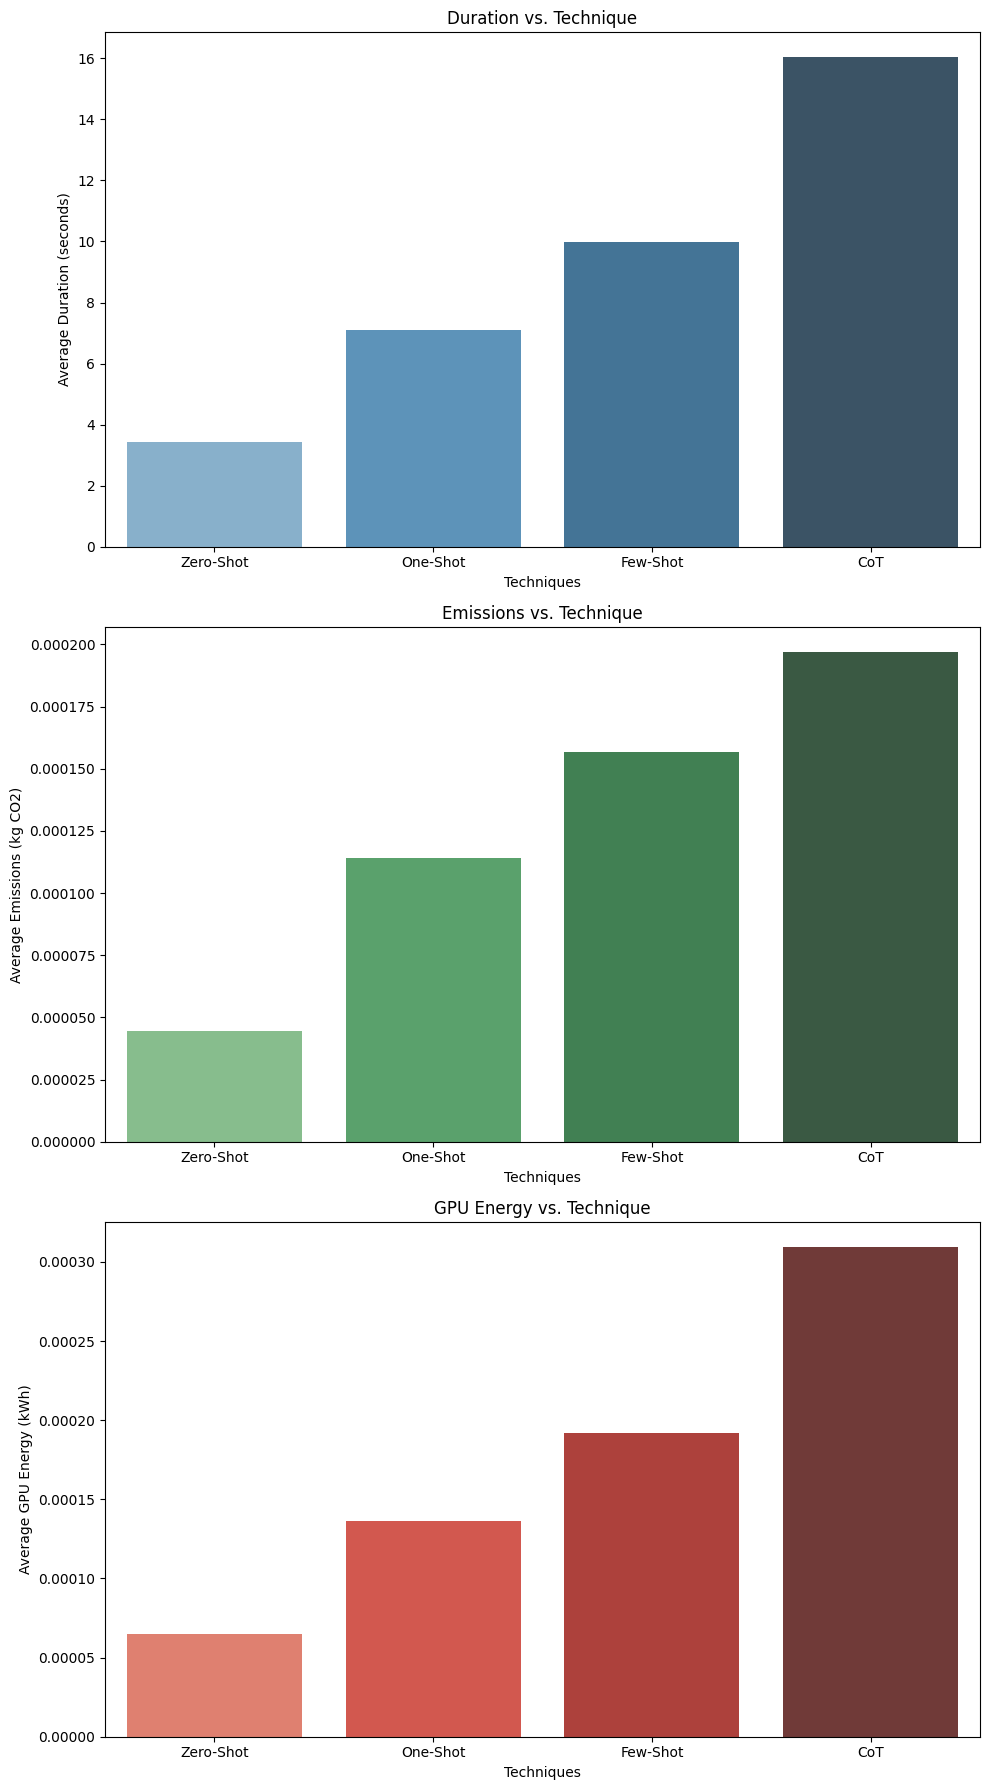

In [3]:
durations = []
emissions = []
gpu_energies = []

for technique in techniques:
    file_path = os.path.join(base_dir, technique, f'{technique}_global_dataset.csv')
    df = pd.read_csv(file_path)
    
    durations.append(df['duration_mean'].mean())  
    emissions.append(df['emissions_mean'].mean())  
    gpu_energies.append(df['gpu_energy_mean'].mean())  


fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Duration vs Technique
sns.barplot(x=techniques, y=durations, ax=axs[0], palette="Blues_d")
axs[0].set_title('Duration vs. Technique')
axs[0].set_xlabel('Techniques')
axs[0].set_ylabel('Average Duration (seconds)')

# Emissions vs Technique
sns.barplot(x=techniques, y=emissions, ax=axs[1], palette="Greens_d")
axs[1].set_title('Emissions vs. Technique')
axs[1].set_xlabel('Techniques')
axs[1].set_ylabel('Average Emissions (kg CO2)')

# GPU Energy vs Technique
sns.barplot(x=techniques, y=gpu_energies, ax=axs[2], palette="Reds_d")
axs[2].set_title('GPU Energy vs. Technique')
axs[2].set_xlabel('Techniques')
axs[2].set_ylabel('Average GPU Energy (kWh)')

# Adjust layout
plt.tight_layout()
plt.show()


Average tokens for Zero-Shot: 513.423


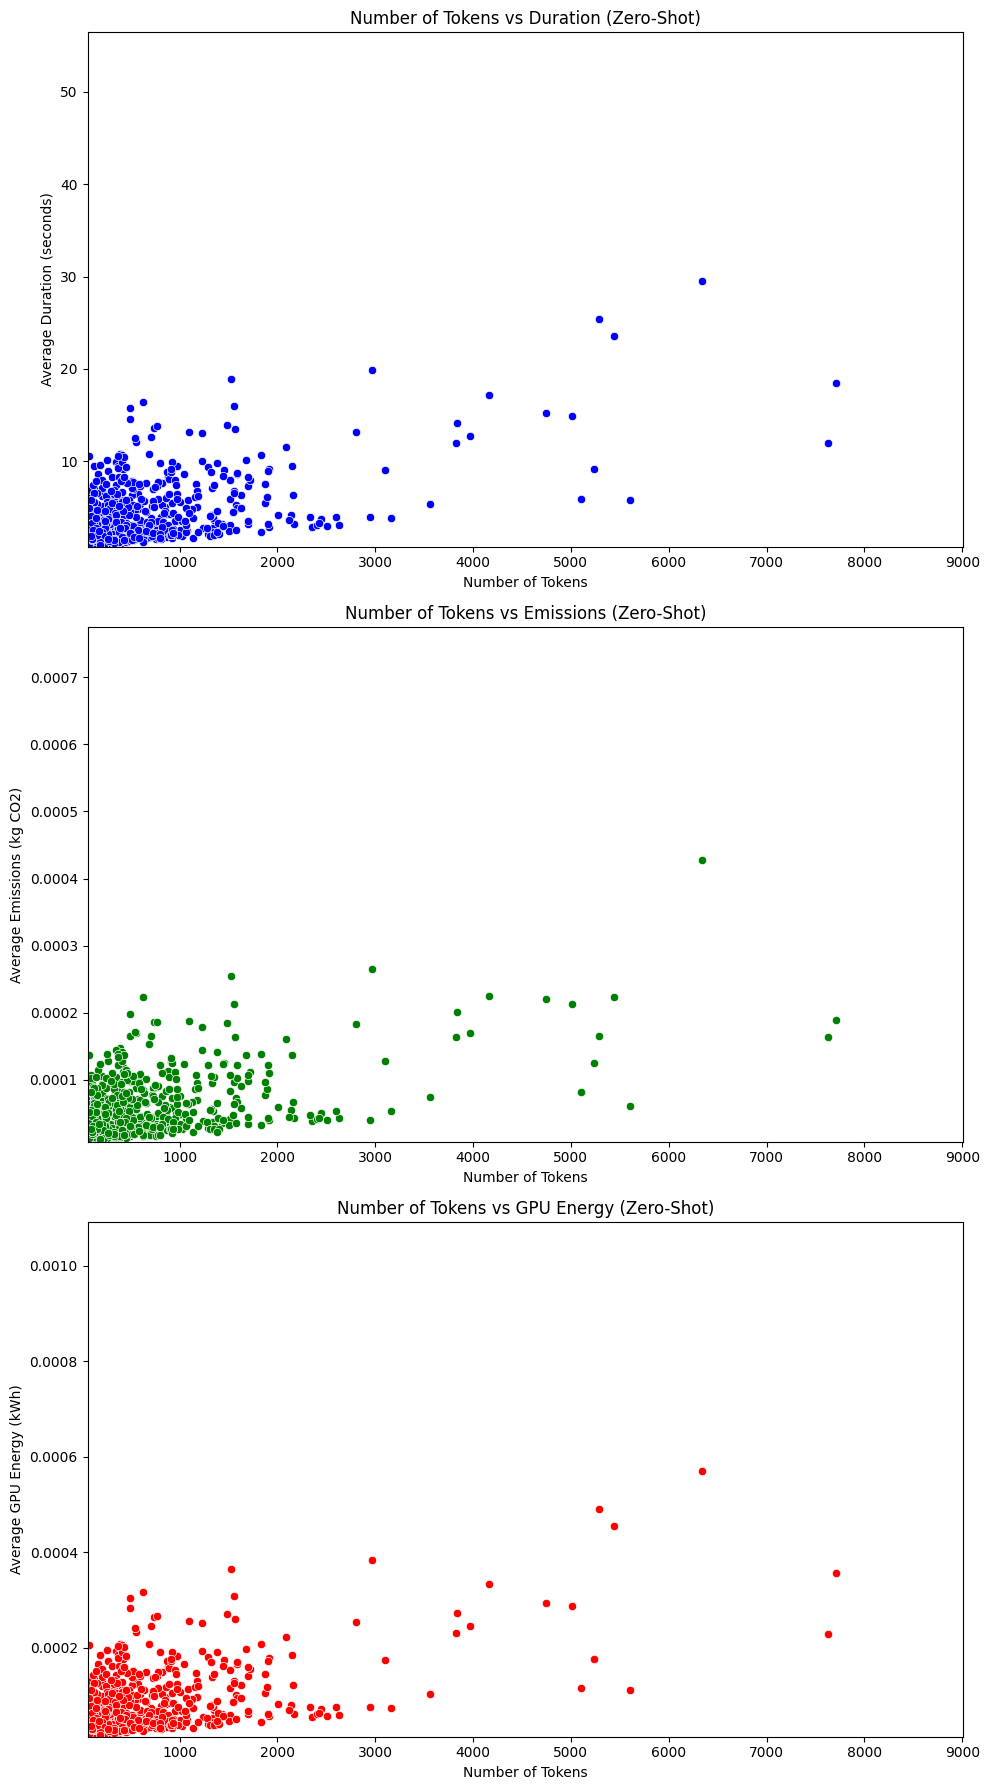

Average tokens for One-Shot: 740.423


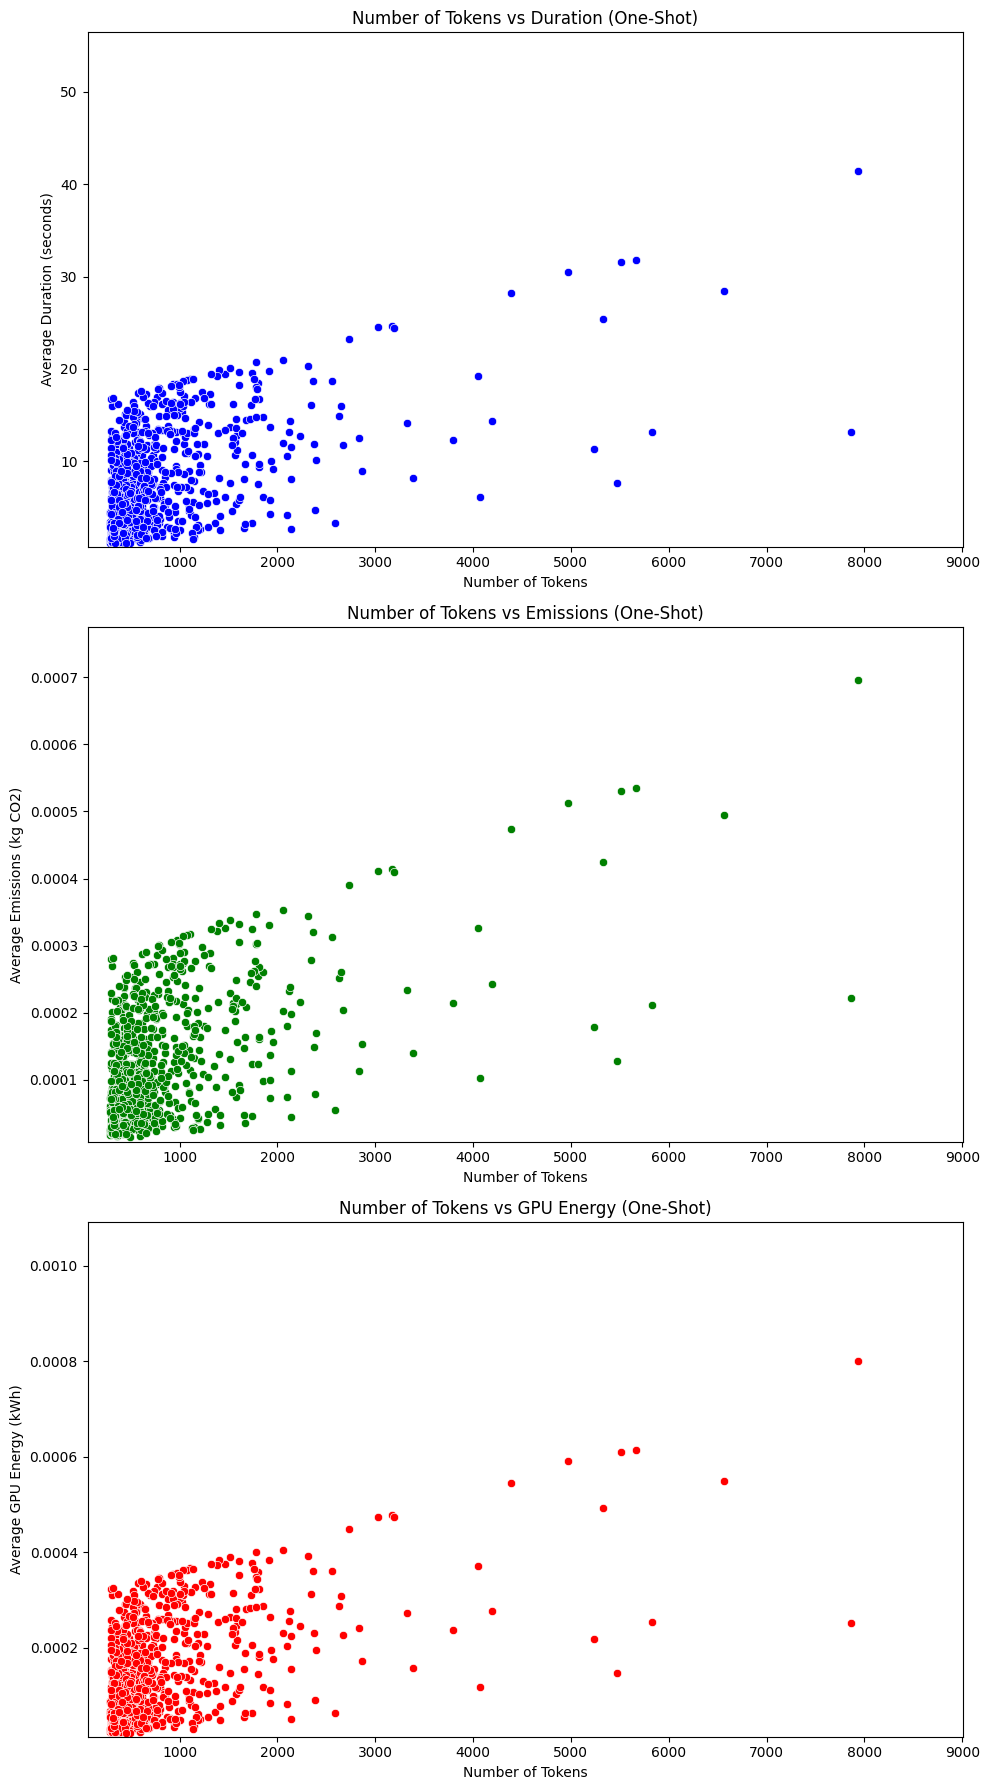

Average tokens for Few-Shot: 1812.423


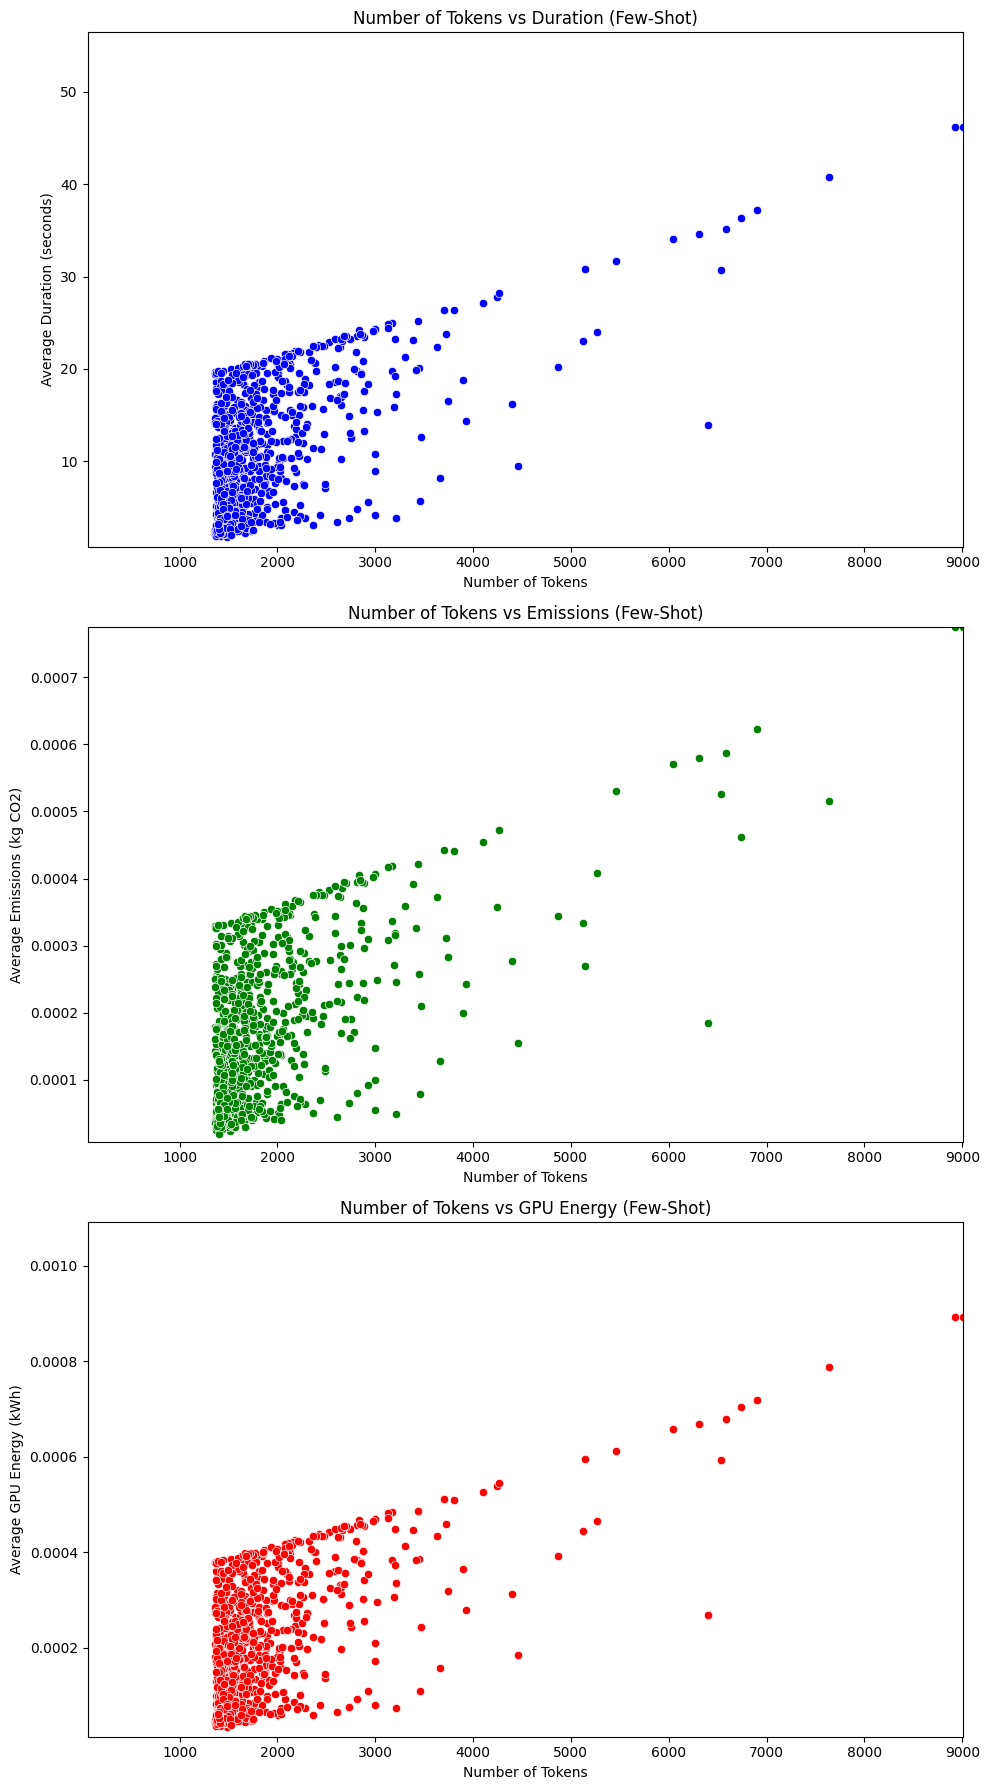

Average tokens for CoT: 787.251


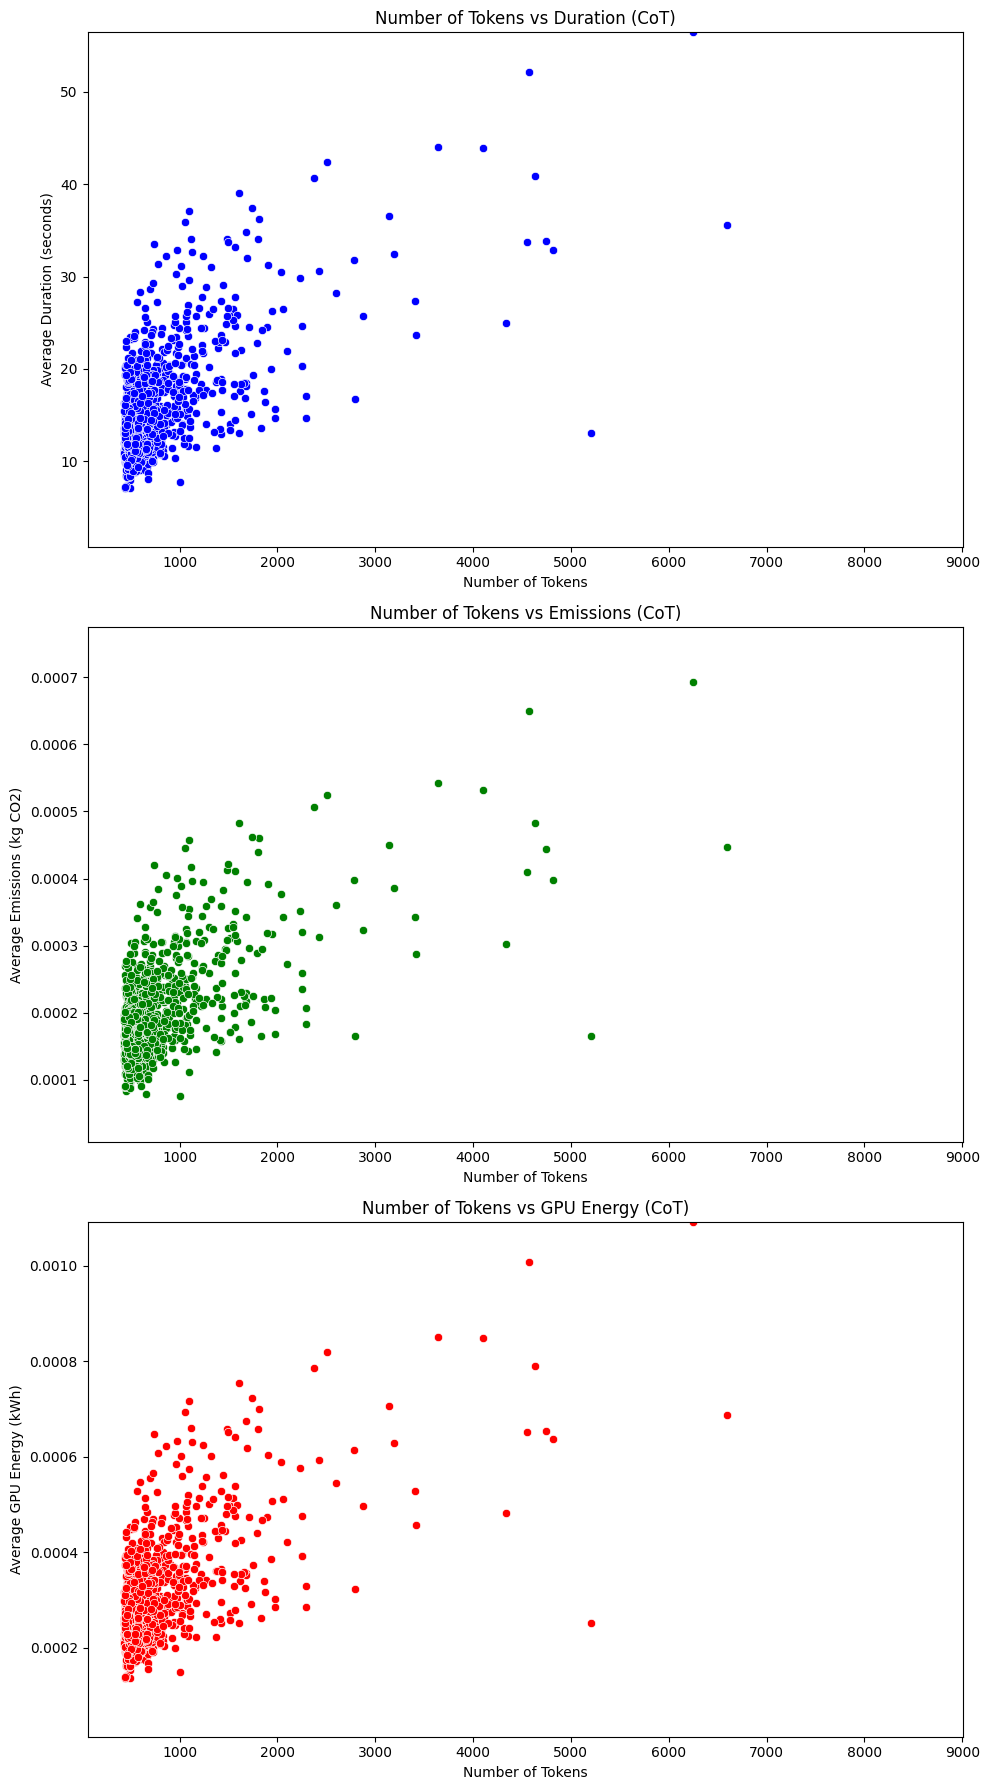

C:\Users\jenit\AppData\Local\Temp\ipykernel_15184\3155257376.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=PETs, y=average_tokens, palette='viridis')


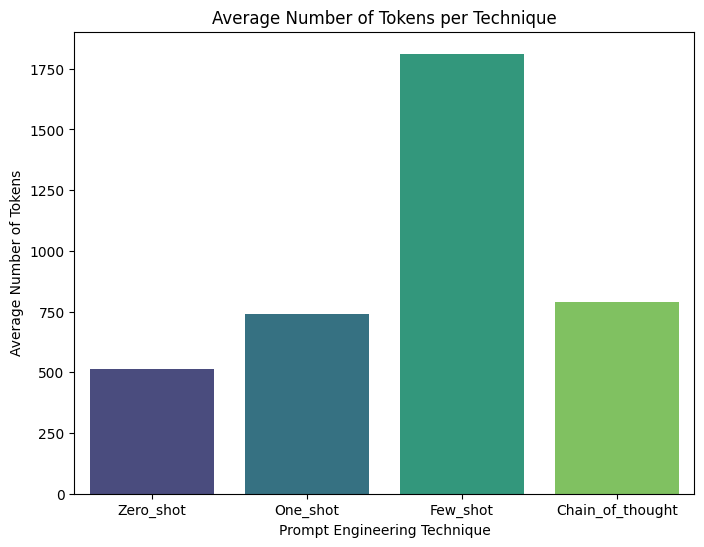

In [4]:
PETs = ['Zero_shot', 'One_shot', 'Few_shot', 'Chain_of_thought']
average_tokens = []  

token_min, token_max = float('inf'), float('-inf')
duration_min, duration_max = float('inf'), float('-inf')
emissions_min, emissions_max = float('inf'), float('-inf')
gpu_energy_min, gpu_energy_max = float('inf'), float('-inf')

for technique, pet in zip(techniques, PETs):
    
    global_file_path = os.path.join(base_dir, technique, f'{technique}_global_dataset.csv')
    global_df = pd.read_csv(global_file_path)
    
    token_file_path = os.path.join(base_dir, 'Datasets', f'{pet}_Dataset.csv') 
    token_df = pd.read_csv(token_file_path, nrows=1000)
    
    merged_df = pd.concat([global_df, token_df['number_of_tokens']], axis=1)
    
    token_min = min(token_min, merged_df['number_of_tokens'].min()) 
    token_max = max(token_max, merged_df['number_of_tokens'].max())
    
    duration_min = min(duration_min, merged_df['duration_mean'].min()) 
    duration_max = max(duration_max, merged_df['duration_mean'].max()) 
    
    emissions_min = min(emissions_min, merged_df['emissions_mean'].min()) 
    emissions_max = max(emissions_max, merged_df['emissions_mean'].max()) 
    
    gpu_energy_min = min(gpu_energy_min, merged_df['gpu_energy_mean'].min()) 
    gpu_energy_max = max(gpu_energy_max, merged_df['gpu_energy_mean'].max()) 

for technique, pet in zip(techniques, PETs):
    
    global_file_path = os.path.join(base_dir, technique, f'{technique}_global_dataset.csv')
    global_df = pd.read_csv(global_file_path)
    
    token_file_path = os.path.join(base_dir, 'Datasets', f'{pet}_Dataset.csv') 
    token_df = pd.read_csv(token_file_path, nrows=1000)
    
    merged_df = pd.concat([global_df, token_df['number_of_tokens']], axis=1)
    
    avg_tokens = merged_df['number_of_tokens'].mean()
    average_tokens.append(avg_tokens)  
    
    print(f"Average tokens for {technique}: {avg_tokens}")

    fig, axs = plt.subplots(3, 1, figsize=(10, 18))

    # Tokens vs Duration
    sns.scatterplot(x='number_of_tokens', y='duration_mean', data=merged_df, ax=axs[0], color='blue')
    axs[0].set_title(f'Number of Tokens vs Duration ({technique})')
    axs[0].set_xlabel('Number of Tokens')
    axs[0].set_ylabel('Average Duration (seconds)')
    axs[0].set_xlim(token_min, token_max)  
    axs[0].set_ylim(duration_min, duration_max)  

    # Tokens vs Emissions
    sns.scatterplot(x='number_of_tokens', y='emissions_mean', data=merged_df, ax=axs[1], color='green')
    axs[1].set_title(f'Number of Tokens vs Emissions ({technique})')
    axs[1].set_xlabel('Number of Tokens')
    axs[1].set_ylabel('Average Emissions (kg CO2)')
    axs[1].set_xlim(token_min, token_max)  
    axs[1].set_ylim(emissions_min, emissions_max)  

    # Tokens vs GPU Energy
    sns.scatterplot(x='number_of_tokens', y='gpu_energy_mean', data=merged_df, ax=axs[2], color='red')
    axs[2].set_title(f'Number of Tokens vs GPU Energy ({technique})')
    axs[2].set_xlabel('Number of Tokens')
    axs[2].set_ylabel('Average GPU Energy (kWh)')
    axs[2].set_xlim(token_min, token_max)  
    axs[2].set_ylim(gpu_energy_min, gpu_energy_max)  

    plt.tight_layout()
    plt.show()

# Plot the average number of tokens for each technique
plt.figure(figsize=(8, 6))
sns.barplot(x=PETs, y=average_tokens, palette='viridis')
plt.title('Average Number of Tokens per Technique')
plt.xlabel('Prompt Engineering Technique')
plt.ylabel('Average Number of Tokens')
plt.show()


### **Performance Evaluation**

In [5]:
exact_matches = []
edit_similarities = []

In [6]:
def find_and_trim(text):
    end_index = min(
        (text.find(';') if ';' in text else float('inf')),
        (text.find('}') if '}' in text else float('inf')),
        (text.find('{') if '{' in text else float('inf'))
    )
    if end_index != float('inf'):
        completion = text[:end_index + 1].strip()
        return completion.replace('{', '').strip()
    return text.strip()

def post_process(text):
    return text.strip().lower()


baseline_path = os.path.join(base_dir, 'Datasets', 'Zero_shot_Dataset.csv')
base = pd.read_csv(baseline_path, usecols=['gt'], nrows=1000)

for technique in techniques[:3]:
    print(f"Processing technique: {technique}")
    
    total = 0
    EM = 0.0
    edit_sim = 0.0

    for i in range(1, 6):
        csv_file_path = os.path.join(base_dir, technique, f'generated_texts_{i}.csv')
        df = pd.read_csv(csv_file_path)
        
        df['preds'] = df['Generated Code'].apply(find_and_trim).tolist()
        
        # Check if the lengths match
        assert len(df) == len(base), f"Samples of predictions and ground truths are not equal in dataset {i} for technique {technique}, {len(df)}: {len(base)}"

        # Iterate through both DataFrames row by row
        for j in range(len(base)):
            pred = post_process(df.loc[j, 'preds'])
            gt = post_process(base.loc[j, 'gt'])
            
            # Calculate edit similarity ratio and exact match
            edit_sim += fuzz.ratio(pred, gt)
            if pred.split() == gt.split():
                EM += 1
        
        # Update total count
        total += len(base)

    # Calculate average edit similarity and exact match ratio
    avg_edit_sim = edit_sim / total
    exact_match_ratio = EM / total

    exact_matches.append(exact_match_ratio)
    edit_similarities.append(avg_edit_sim)
    
    # Print the results for the current technique
    print(f"Technique: {technique}")
    print(f"Exact Match Ratio: {exact_match_ratio:.2%}")
    print(f"Average Edit Similarity: {avg_edit_sim:.2f}")
    print("-" * 40)


Processing technique: Zero-Shot
Technique: Zero-Shot
Exact Match Ratio: 0.42%
Average Edit Similarity: 38.08
----------------------------------------
Processing technique: One-Shot
Technique: One-Shot
Exact Match Ratio: 7.80%
Average Edit Similarity: 64.74
----------------------------------------
Processing technique: Few-Shot
Technique: Few-Shot
Exact Match Ratio: 19.02%
Average Edit Similarity: 71.00
----------------------------------------


In [7]:
def extract_original_code(chat_column):
    try:
        conversation = ast.literal_eval(chat_column)
        for message in reversed(conversation):
            if message['role'] == 'user':
                # The last 'user' message contains the code segment
                return message['content'].split('Here is the Java code segment:')[-1].strip()
    except (ValueError, SyntaxError):
        return ""
    
    return ""

def find_and_trim(text):
    lines = text.splitlines()
    
    for line in lines:
        line = line.strip()
        if line.startswith("//") or line.startswith("#") or not line:
            continue  
        
        end_index = min(
            (line.find(';') if ';' in line else float('inf')),
            (line.find('}') if '}' in line else float('inf')),
            (line.find('{') if '{' in line else float('inf'))
        )
        if end_index != float('inf'):
            completion = line[:end_index + 1].strip()
            return completion.replace('{', '').strip()

    return text.strip()

def remove_repeated_code(original_code, predicted_code):
    
    original_code = original_code.strip()
    predicted_code = predicted_code.strip()

    overlap_end_index = 0

    for i in range(len(predicted_code)):
        if original_code.endswith(predicted_code[:i]):
            overlap_end_index = i
    
    unique_part = predicted_code[overlap_end_index:].strip()
    return unique_part

def find_and_trim(text):
    lines = text.splitlines()
    
    for line in lines:
        line = line.strip()
        if line.startswith("//") or line.startswith("#") or not line:
            continue  
        
        end_index = min(
            (line.find(';') if ';' in line else float('inf')),
            (line.find('}') if '}' in line else float('inf')),
            (line.find('{') if '{' in line else float('inf'))
        )
        if end_index != float('inf'):
            completion = line[:end_index + 1].strip()
            return completion.replace('{', '').strip()

    return text.strip()

chain_of_thought_dataset_path = 'C:\\Users\\jenit\\Desktop\\Main Code\\LLama-8B-Instruct\\Datasets\\Chain_of_thought_Dataset.csv'
chain_df = pd.read_csv(chain_of_thought_dataset_path, usecols=['Chat'], nrows=1000)

technique = techniques[-1]

print(f"Processing technique: {technique}")

total = 0
EM = 0.0
edit_sim = 0.0

for i in range(1, 6):
    csv_file_path = os.path.join(base_dir, technique, f'generated_texts_{i}.csv')
    df = pd.read_csv(csv_file_path)

    df['Original Code Segment'] = chain_df['Chat'].apply(extract_original_code)

    # Apply find_and_trim to get the code completions
    df['preds'] = df['Generated Code'].apply(find_and_trim).tolist()

    # Remove the repeated part by comparing with the original code segment
    df['preds'] = df.apply(lambda row: remove_repeated_code(row['Original Code Segment'], row['preds']), axis=1)
    
    assert len(df) == len(base), f"Samples of predictions and ground truths are not equal in dataset {i} for technique {technique}, {len(df)}: {len(base)}"

    for j in range(len(base)):
        pred = post_process(df.loc[j, 'preds'])
        gt = post_process(base.loc[j, 'gt'])
        
        edit_sim += fuzz.ratio(pred, gt)
        if pred.split() == gt.split():
            EM += 1
    
    total += len(base)

avg_edit_sim = edit_sim / total
exact_match_ratio = EM / total

exact_matches.append(exact_match_ratio)
edit_similarities.append(avg_edit_sim)

print(f"Technique: {technique}")
print(f"Exact Match Ratio: {exact_match_ratio:.2%}")
print(f"Average Edit Similarity: {avg_edit_sim:.2f}")
print("-" * 40)



Processing technique: CoT
Technique: CoT
Exact Match Ratio: 0.24%
Average Edit Similarity: 36.83
----------------------------------------


In [8]:
exact_matches

[0.0042, 0.078, 0.1902, 0.0024]

In [9]:
edit_similarities

[38.0792, 64.7368, 70.996, 36.8342]

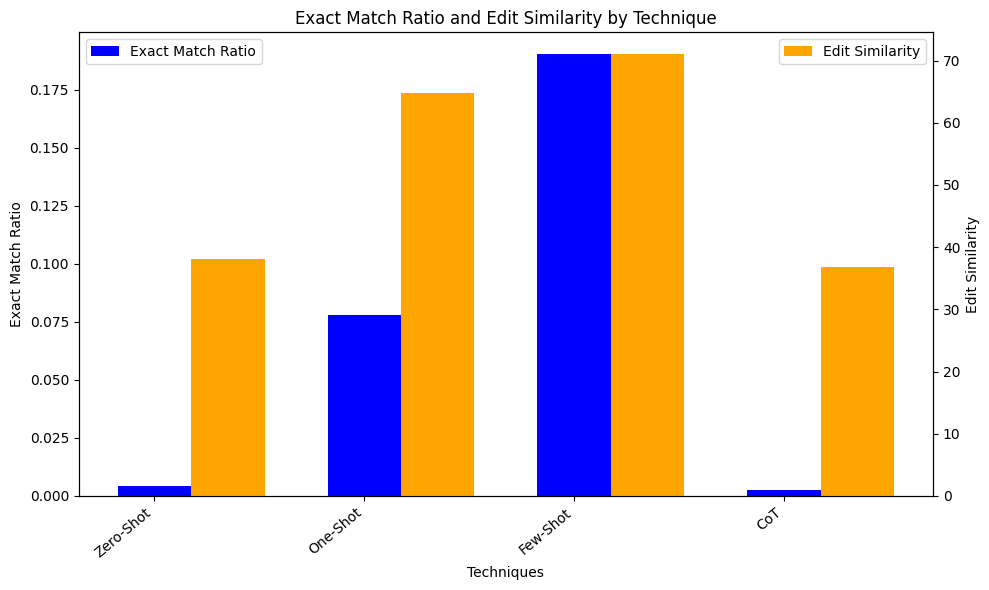

In [10]:
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(techniques))

bars1 = ax1.bar(index, exact_matches, bar_width, label='Exact Match Ratio', color='blue')
ax1.set_xlabel('Techniques')
ax1.set_ylabel('Exact Match Ratio')
ax1.set_title('Exact Match Ratio and Edit Similarity by Technique')
ax1.set_xticks(index)
ax1.set_xticklabels(techniques, rotation=40, ha='right')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width, edit_similarities, bar_width, label='Edit Similarity', color='orange')
ax2.set_ylabel('Edit Similarity')
ax2.tick_params(axis='y')

fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()